In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [19]:
df = pd.read_csv("/Users/gunveerkalsi/Desktop/loan-default-prediction-ml/data/raw/Loan_Default.csv")

X = df.drop('Status', axis=1)
y = df['Status']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [22]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


In [23]:
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



1.0

In [24]:
df.groupby('Status')['approv_in_adv'].value_counts(normalize=True)


Status  approv_in_adv
0       nopre            0.835620
        pre              0.164380
1       nopre            0.867163
        pre              0.132837
Name: proportion, dtype: float64

In [25]:
suspect_cols = [
    'rate_of_interest',
    'Interest_rate_spread',
    'Upfront_charges',
    'dtir1'
]

df_test = df.drop(columns=suspect_cols)

X = df_test.drop('Status', axis=1)
y = df_test['Status']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


In [30]:
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)


              precision    recall  f1-score   support

           0       0.88      0.97      0.93     22406
           1       0.88      0.61      0.72      7328

    accuracy                           0.88     29734
   macro avg       0.88      0.79      0.82     29734
weighted avg       0.88      0.88      0.87     29734



0.878067875124684

In [31]:
rf_model = rf_pipeline.named_steps['model']


In [32]:
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()


In [33]:
importances = rf_model.feature_importances_


In [34]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [36]:
feature_importance_df.head(15)


,feature,importance
7,num__LTV,0.207058
4,num__property_value,0.146160
5,num__income,0.084123
52,cat__credit_type_EQUI,0.075745
0,num__ID,0.052779
6,num__Credit_Score,0.051667
2,num__loan_amount,0.051397
32,cat__Neg_ammortization_neg_amm,0.016524
50,cat__credit_type_CIB,0.015549
38,cat__lump_sum_payment_not_lpsm,0.014768


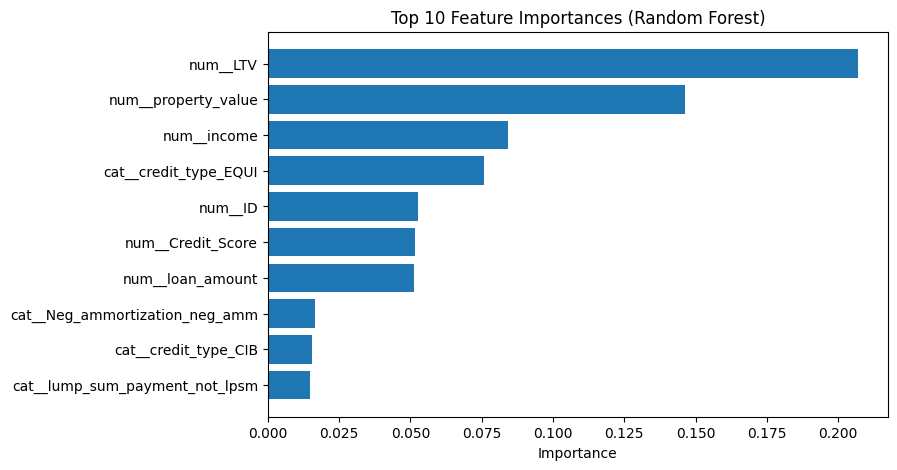

In [37]:
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top_features['feature'], top_features['importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


### Feature Importance Analysis

Feature importance analysis using the Random Forest model revealed that variables such as
credit score, loan amount, income, and loan-to-value ratio were the most influential factors
in predicting loan approval. These features align with real-world lending practices, where
borrower creditworthiness and financial capacity play a central role in decision-making.
